In [1]:
"""FC3 Genetic Alorithm from El Rosario to Consulado"""

import random
from typing import List, Tuple
from rutas import *

In [2]:

start_point = 'El Rosario'
end_point = 'San Lázaro'
size_pop = 5
num_generations = 20
elite_size = 1
mutation_rate = 0
# Genome

In [3]:

Genome = Tuple[List[int], int, List[str], List[Tuple[str, str]]]
# List of indexes, time, lineas, stages

def generate_genome(rutas: List[Ruta], start_point: str, end_point: str) -> Genome:
    current_point = start_point
    indexes = []
    stages = []
    while current_point != end_point:
        available_routes = [i for i, ruta in enumerate(rutas) if current_point == ruta.start]
        if not available_routes:
            raise ValueError(f"No available routes from {current_point}")
        i = random.choice(available_routes)
        indexes.append(i)
        next_point = rutas[i].end
        stages.append((current_point, next_point))
        current_point = next_point
    time = sum(rutas[i].time for i in indexes)
    lineas = [rutas[i].linea for i in indexes]
    genome_str = f" El tiempo fue de: {time}, Rutas disponibles tomadas: {indexes}, Las estaciones fueron de: {stages}, en las lineas: {lineas},"
    return indexes, time, lineas, stages, genome_str

genome = generate_genome(rutas, start_point, end_point)
print(genome[4])

 El tiempo fue de: 356, Rutas disponibles tomadas: [34, 35, 90, 89, 34, 89, 34, 89, 34, 35, 8, 63, 42, 97, 0, 55, 42, 74, 73, 63, 62, 7, 90, 89, 31, 86, 31, 27, 70, 15, 70, 15, 28, 77, 88, 69, 14, 33, 22, 83, 16, 71, 82, 86, 31, 81, 26, 81, 26, 81, 26, 32, 69, 14, 87, 81, 26, 81, 26, 81, 26, 32, 33, 22, 83, 16, 50, 105, 71, 16, 71, 82, 81, 26, 27, 28, 23, 24, 25, 45, 100, 45, 85, 30, 85, 84, 29, 84, 83, 28, 83, 70, 33, 88, 69, 14, 69, 14, 15, 70, 33, 22, 83, 16, 71, 82, 32, 69, 14, 87, 81, 26, 81, 26, 86, 34, 89, 34, 35, 8, 18, 19, 97, 62, 7, 0, 1, 40, 66, 57, 2, 3, 4], Las estaciones fueron de: [('El Rosario', 'Tacuba'), ('Tacuba', 'Tacubaya'), ('Tacubaya', 'Tacuba'), ('Tacuba', 'El Rosario'), ('El Rosario', 'Tacuba'), ('Tacuba', 'El Rosario'), ('El Rosario', 'Tacuba'), ('Tacuba', 'El Rosario'), ('El Rosario', 'Tacuba'), ('Tacuba', 'Tacubaya'), ('Tacubaya', 'Hidalgo'), ('Hidalgo', 'Tacubaya'), ('Tacubaya', 'Centro Médico'), ('Centro Médico', 'Tacubaya'), ('Tacubaya', 'Balderas'), ('Ba

In [4]:
# Population
Population = List[Genome]

def generate_population(rutas: List[Ruta], size_pop) -> Population:
    """function to generate a population of genomes"""
    return [generate_genome(rutas, start_point, end_point) for _ in range(size_pop)]

population = generate_population(rutas, size_pop)
print('\n'.join(map(str, population)))

([31, 86, 31, 32, 33, 88, 87, 86, 31, 86, 34, 89, 34, 35, 0, 1, 56, 19, 74, 1, 2, 11, 12, 48, 103, 102, 21, 76, 21, 76, 47, 13, 68, 67, 41, 96, 98, 74, 73, 63, 8, 63, 8, 63, 62, 7, 0, 55, 42, 20, 101, 46, 21, 76, 75, 20, 101, 91, 90, 35, 0, 1, 94, 64, 63, 8, 63, 36, 91, 42, 97, 42, 43, 12, 102, 75, 74, 73, 18, 19, 74, 73, 18, 55, 8, 63, 8, 63, 36, 37, 92, 37, 92, 46, 21, 76, 101, 46, 101, 91, 62, 7, 0, 55, 42, 74, 55, 36, 46, 101, 46, 21, 76, 21, 76, 47, 67, 44, 80, 4], 422, ['6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '7', '7', '7', '7', '1', '1', '1', '3', '3', '1', '1', '2', '2', '12', '12', '12', '3', '3', '3', '3', '12', '2', '2', '2', '8', '8', '9', '3', '3', '2', '2', '2', '2', '2', '2', '2', '1', '1', '9', '3', '12', '12', '3', '3', '3', '3', '12', '7', '7', '7', '1', '1', '8', '2', '2', '2', '2', '7', '7', '9', '9', '9', '9', '2', '12', '3', '3', '3', '3', '3', '3', '3', '3', '1', '2', '2', '2', '2', '7', '7', '7', '7', '7', '12', '3', '3', '12', '12', '12', '7', '2', '2

In [5]:
def fitness(genome: Genome, rutas: List[Ruta]) -> float:
    """function to calculate the fitness of a genome"""
    time = genome[1]  # genome[1] is the total time
    value = 1/time if time != 0 else 0  # Avoid division by zero
    return value

In [6]:
def elitism(population: Population, rutas: List[Ruta], elite_size: int) -> Population:
    """function to carry over the top individuals to the next generation"""
    fitness_values = [(genome, fitness(genome, rutas)) for genome in population]
    sorted_by_fitness = sorted(fitness_values, key=lambda x: x[1], reverse=True)
    elite = [genome for genome in sorted_by_fitness[:elite_size]]
    return elite, fitness_values, sorted_by_fitness

elite, fitness_values, sorted_by_fitness = elitism(population, rutas, elite_size)

print("\nFitness values:")
for i, genome in enumerate(population):
    print(fitness_values[i][1])

print("\nFitness values afer sorting:")
for i, genome in enumerate(population):
    print(sorted_by_fitness[i][1])

print("\nBest genomes:")
for genome in elite:
    print(genome)


Fitness values:
0.002369668246445498
0.002004008016032064
0.021739130434782608
0.022727272727272728
0.043478260869565216

Fitness values afer sorting:
0.043478260869565216
0.022727272727272728
0.021739130434782608
0.002369668246445498
0.002004008016032064

Best genomes:
(([34, 35, 62, 7, 0, 1, 2, 3, 4], 23, ['7', '7', '2', '2', '1', '1', '1', '1', '1'], [('El Rosario', 'Tacuba'), ('Tacuba', 'Tacubaya'), ('Tacubaya', 'Cuatro Caminos'), ('Cuatro Caminos', 'Tacubaya'), ('Tacubaya', 'Balderas'), ('Balderas', 'Salto del Agua'), ('Salto del Agua', 'Pino Suárez'), ('Pino Suárez', 'Candelaria'), ('Candelaria', 'San Lázaro')], " El tiempo fue de: 23, Rutas disponibles tomadas: [34, 35, 62, 7, 0, 1, 2, 3, 4], Las estaciones fueron de: [('El Rosario', 'Tacuba'), ('Tacuba', 'Tacubaya'), ('Tacubaya', 'Cuatro Caminos'), ('Cuatro Caminos', 'Tacubaya'), ('Tacubaya', 'Balderas'), ('Balderas', 'Salto del Agua'), ('Salto del Agua', 'Pino Suárez'), ('Pino Suárez', 'Candelaria'), ('Candelaria', 'San Lázar

No tengo idea como hacer el crossover, supongo que cuando haya un punto en comun, pero pueden tomar muchos muchos muchos caminos, mejor solo usamos elitismo

In [7]:

def mutate_genome(genome: Genome, rutas: List[Ruta], start_point: str, end_point: str) -> Genome:
    """function to mutate a genome"""
    # Choose a random index to mutate
    index_to_mutate = random.randint(1, len(genome[0]) - 1)
    new_start_point = rutas[genome[0][index_to_mutate - 1]].end
    # Generate a new route
    new_route = generate_genome(rutas, new_start_point, end_point)

    # Create the new genome
    new_genome = list(genome)
    new_genome[0] = new_genome[0][:index_to_mutate] + new_route[0]
    new_genome[1] = sum(rutas[i].time for i in new_genome[0])
    new_genome[2] = [rutas[i].linea for i in new_genome[0]]
    new_genome[3] = [(rutas[i].start, rutas[i].end) for i in new_genome[0]]
    new_genome[4] = f" El tiempo fue de: {new_genome[1]}, Rutas disponibles tomadas: {new_genome[0]}, Las estaciones fueron de: {new_genome[3]}, en las lineas: {new_genome[2]},"

    return (new_genome)

print("\nOriginal genome:")
print(population[0])

print("\nMutated genome:")
print(mutate_genome(population[0], rutas, start_point, end_point))



Original genome:
([31, 86, 31, 32, 33, 88, 87, 86, 31, 86, 34, 89, 34, 35, 0, 1, 56, 19, 74, 1, 2, 11, 12, 48, 103, 102, 21, 76, 21, 76, 47, 13, 68, 67, 41, 96, 98, 74, 73, 63, 8, 63, 8, 63, 62, 7, 0, 55, 42, 20, 101, 46, 21, 76, 75, 20, 101, 91, 90, 35, 0, 1, 94, 64, 63, 8, 63, 36, 91, 42, 97, 42, 43, 12, 102, 75, 74, 73, 18, 19, 74, 73, 18, 55, 8, 63, 8, 63, 36, 37, 92, 37, 92, 46, 21, 76, 101, 46, 101, 91, 62, 7, 0, 55, 42, 74, 55, 36, 46, 101, 46, 21, 76, 21, 76, 47, 67, 44, 80, 4], 422, ['6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '7', '7', '7', '7', '1', '1', '1', '3', '3', '1', '1', '2', '2', '12', '12', '12', '3', '3', '3', '3', '12', '2', '2', '2', '8', '8', '9', '3', '3', '2', '2', '2', '2', '2', '2', '2', '1', '1', '9', '3', '12', '12', '3', '3', '3', '3', '12', '7', '7', '7', '1', '1', '8', '2', '2', '2', '2', '7', '7', '9', '9', '9', '9', '2', '12', '3', '3', '3', '3', '3', '3', '3', '3', '1', '2', '2', '2', '2', '7', '7', '7', '7', '7', '12', '3', '3', '12', '12', 

In [8]:
def mutate_best_genome(population: Population, rutas: List[Ruta], start_point: str, end_point: str) -> Genome:
    """function to mutate the genome with the best fitness score"""
    # Calculate fitness scores for the population
    fitness_scores = [fitness(genome, rutas) for genome in population]
    # Identify the genome with the best fitness score
    best_genome = population[fitness_scores.index(max(fitness_scores))]
    # Mutate the best genome
    mutated_best_genome = mutate_genome(best_genome, rutas, start_point, end_point)

    return mutated_best_genome

print("Original best genome: ")
print(elite[0])

print("\nMutated genome with best fitness score:")
print(mutate_best_genome(population, rutas, start_point, end_point))

Original best genome: 
(([34, 35, 62, 7, 0, 1, 2, 3, 4], 23, ['7', '7', '2', '2', '1', '1', '1', '1', '1'], [('El Rosario', 'Tacuba'), ('Tacuba', 'Tacubaya'), ('Tacubaya', 'Cuatro Caminos'), ('Cuatro Caminos', 'Tacubaya'), ('Tacubaya', 'Balderas'), ('Balderas', 'Salto del Agua'), ('Salto del Agua', 'Pino Suárez'), ('Pino Suárez', 'Candelaria'), ('Candelaria', 'San Lázaro')], " El tiempo fue de: 23, Rutas disponibles tomadas: [34, 35, 62, 7, 0, 1, 2, 3, 4], Las estaciones fueron de: [('El Rosario', 'Tacuba'), ('Tacuba', 'Tacubaya'), ('Tacubaya', 'Cuatro Caminos'), ('Cuatro Caminos', 'Tacubaya'), ('Tacubaya', 'Balderas'), ('Balderas', 'Salto del Agua'), ('Salto del Agua', 'Pino Suárez'), ('Pino Suárez', 'Candelaria'), ('Candelaria', 'San Lázaro')], en las lineas: ['7', '7', '2', '2', '1', '1', '1', '1', '1'],"), 0.043478260869565216)

Mutated genome with best fitness score:
[[34, 89, 31, 32, 15, 28, 23, 24, 58, 3, 79, 78, 23, 78, 77, 88, 69, 14, 33, 22, 83, 28, 77, 88, 33, 22, 77, 22, 83

In [9]:
mutation_rate = 0
def create_new_population(population: Population, rutas: List[Ruta], elite_size: int, mutation_rate: float) -> Population:
    """function to create a new population"""
    # Select the elite individuals
    elite = elitism(population, rutas, elite_size)
    # Generate mutations of the elite individuals
    mutations = [mutate_genome(genome, rutas, start_point, end_point) for genome in elite if random.random() < mutation_rate]
    # Create the new population
    new_population = list(elite) + mutations
    return new_population

new_population = create_new_population(population, rutas, elite_size, mutation_rate)

print("\nNew population:")
print('\n'.join(map(str, new_population)))




New population:
[(([34, 35, 62, 7, 0, 1, 2, 3, 4], 23, ['7', '7', '2', '2', '1', '1', '1', '1', '1'], [('El Rosario', 'Tacuba'), ('Tacuba', 'Tacubaya'), ('Tacubaya', 'Cuatro Caminos'), ('Cuatro Caminos', 'Tacubaya'), ('Tacubaya', 'Balderas'), ('Balderas', 'Salto del Agua'), ('Salto del Agua', 'Pino Suárez'), ('Pino Suárez', 'Candelaria'), ('Candelaria', 'San Lázaro')], " El tiempo fue de: 23, Rutas disponibles tomadas: [34, 35, 62, 7, 0, 1, 2, 3, 4], Las estaciones fueron de: [('El Rosario', 'Tacuba'), ('Tacuba', 'Tacubaya'), ('Tacubaya', 'Cuatro Caminos'), ('Cuatro Caminos', 'Tacubaya'), ('Tacubaya', 'Balderas'), ('Balderas', 'Salto del Agua'), ('Salto del Agua', 'Pino Suárez'), ('Pino Suárez', 'Candelaria'), ('Candelaria', 'San Lázaro')], en las lineas: ['7', '7', '2', '2', '1', '1', '1', '1', '1'],"), 0.043478260869565216)]
[(([31, 86, 31, 32, 33, 88, 87, 86, 31, 86, 34, 89, 34, 35, 0, 1, 56, 19, 74, 1, 2, 11, 12, 48, 103, 102, 21, 76, 21, 76, 47, 13, 68, 67, 41, 96, 98, 74, 73, 63

In [10]:
def create_new_population(population: Population, rutas: List[Ruta], elite_size: int, mutation_rate: float) -> Population:
    """function to create a new population"""
    # Select the elite individuals
    elite, fitness_values, sorted_by_fitness = elitism(population, rutas, elite_size)
    random_genomes = [generate_genome(rutas, start_point, end_point) for _ in range(size_pop - len(elite))]
    
    new_population = (elite) + random_genomes
    return new_population

new_population = create_new_population(population, rutas, elite_size, mutation_rate)

print("\nNew population:")
for genome in new_population:
    print(genome)

print("Size of the new population:", len(new_population))
print("Size of the original population:", len(population))


New population:
(([34, 35, 62, 7, 0, 1, 2, 3, 4], 23, ['7', '7', '2', '2', '1', '1', '1', '1', '1'], [('El Rosario', 'Tacuba'), ('Tacuba', 'Tacubaya'), ('Tacubaya', 'Cuatro Caminos'), ('Cuatro Caminos', 'Tacubaya'), ('Tacubaya', 'Balderas'), ('Balderas', 'Salto del Agua'), ('Salto del Agua', 'Pino Suárez'), ('Pino Suárez', 'Candelaria'), ('Candelaria', 'San Lázaro')], " El tiempo fue de: 23, Rutas disponibles tomadas: [34, 35, 62, 7, 0, 1, 2, 3, 4], Las estaciones fueron de: [('El Rosario', 'Tacuba'), ('Tacuba', 'Tacubaya'), ('Tacubaya', 'Cuatro Caminos'), ('Cuatro Caminos', 'Tacubaya'), ('Tacubaya', 'Balderas'), ('Balderas', 'Salto del Agua'), ('Salto del Agua', 'Pino Suárez'), ('Pino Suárez', 'Candelaria'), ('Candelaria', 'San Lázaro')], en las lineas: ['7', '7', '2', '2', '1', '1', '1', '1', '1'],"), 0.043478260869565216)
([34, 89, 31, 27, 28, 77, 88, 87, 27, 28, 77, 88, 69, 14, 33, 88, 69, 14, 15, 16, 50, 105, 17, 63, 90, 89, 34, 35, 36, 91, 42, 97, 0, 1, 40, 66, 3, 25, 99, 41, 96


Final population:
((((((((((([34, 89, 31, 27, 28, 23, 52], 22, ['7', '7', '6', '5', '5', '4', 'B'], [('El Rosario', 'Tacuba'), ('Tacuba', 'El Rosario'), ('El Rosario', 'Instituto del Petroleo'), ('Instituto del Petroleo', 'La Raza'), ('La Raza', 'Consulado'), ('Consulado', 'Morelos'), ('Morelos', 'San Lázaro')], " El tiempo fue de: 22, Rutas disponibles tomadas: [34, 89, 31, 27, 28, 23, 52], Las estaciones fueron de: [('El Rosario', 'Tacuba'), ('Tacuba', 'El Rosario'), ('El Rosario', 'Instituto del Petroleo'), ('Instituto del Petroleo', 'La Raza'), ('La Raza', 'Consulado'), ('Consulado', 'Morelos'), ('Morelos', 'San Lázaro')], en las lineas: ['7', '7', '6', '5', '5', '4', 'B'],"), 0.045454545454545456), 22.0), 0.045454545454545456), 22.0), 0.045454545454545456), 22.0), 0.045454545454545456), 22.0), 0.045454545454545456), 22.0)
([31, 86, 34, 35, 42, 43, 44, 80, 25, 80, 79, 52], 35, ['6', '6', '7', '7', '9', '9', '9', '4', '4', '4', '4', 'B'], [('El Rosario', 'Instituto del Petroleo'), 

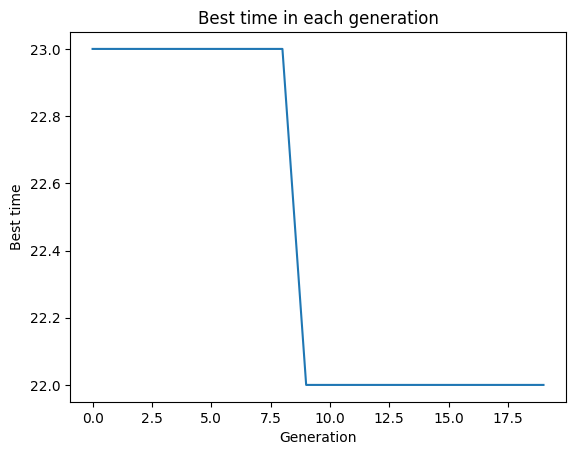

bests times:  [23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 22, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0]


In [11]:
import matplotlib.pyplot as plt

def genetic_algorithm(rutas: List[Ruta], population: Population, num_generations: int, elite_size: int, mutation_rate: float):
    """function to run the genetic algorithm"""
    best_times = []
    for _ in range(num_generations):
        # Create a new population
        population = create_new_population(population, rutas, elite_size, mutation_rate)
        
        # Mutate the population
        for i in range(len(population)):
            if random.random() < mutation_rate:
                population[i] = mutate_genome(population[i], rutas, start_point, end_point)
                
        # Find the best time in this generation and add it to the list
        best_genome = max(population, key=lambda genome: fitness(genome, rutas))
        time = best_genome[1]
        best_times.append(1/time if time < 1 else time)
                
    # Return the final population and the list of best times
    return population, best_times

# Run the genetic algorithm
final_population, best_times = genetic_algorithm(rutas, population, num_generations, elite_size, mutation_rate)

# Print the final population
print("\nFinal population:")
for genome in final_population:
    print(genome)

# Print the best genome
best_genome = max(final_population, key=lambda genome: fitness(genome, rutas))
print("\nBest genome:")
print(best_genome)

# Plot the best times
plt.plot(best_times)
plt.title('Best time in each generation')
plt.xlabel('Generation')
plt.ylabel('Best time')
plt.show()

print("bests times: ", best_times)